In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [2]:
crop_df = pd.read_csv("Crop_recommendation.csv")
crop_df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [3]:
# Value counts the label column
n = len(crop_df['label'].unique())
n

22

In [4]:
# Prepare the features (excluding the species column)
X = crop_df.drop('label', axis=1)

In [5]:
# Perform K-Means clustering with 3 clusters (since we know there are 3 species)
kmeans = KMeans(n_clusters=22, random_state=42)
clusters = kmeans.fit_predict(X)

In [6]:
# Add the cluster labels to the dataframe
crop_df['cluster'] = clusters

In [8]:
crop_df


,N,P,K,temperature,humidity,ph,rainfall,label,cluster
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice,3
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice,20
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice,7
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice,7
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice,7
...,...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee,3
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee,14
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee,14
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee,14


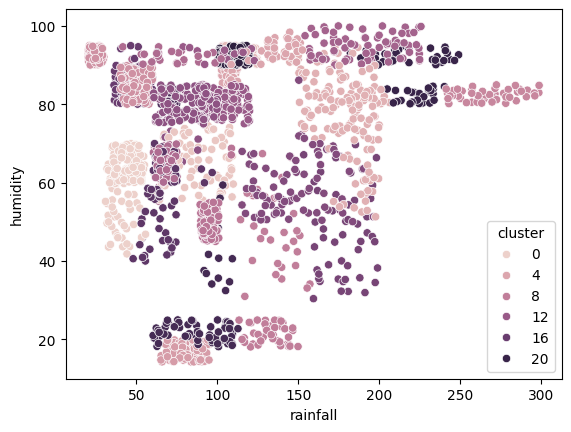

In [10]:
# Create a scatter plot of the clusters
sns.scatterplot(x='rainfall', y='humidity', hue='cluster', data=crop_df)
plt.show()